In [38]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit

def lin_fit(x, P, T0):
    return np.polyval([P, T0], x)

def quad_fit(x, half_dPdE, P, T0):
    return np.polyval([half_dPdE, P, T0], x)

Yee_linear_period = 1.091419649
Yee_linear_T0 = 2456305.455521

In [41]:
url = "https://raw.githubusercontent.com/BoiseStatePlanetary/susie/refs/heads/main/example_data/wasp12b_tra_occ.csv"
data = pd.read_csv(url)
tra_or_occs = np.array(data["tra_or_occ"])
epochs = np.array(data["epoch"].astype('int'))
mid_times = np.array(data["mid_time"])
mid_time_errs = np.array(data["mid_time_err"])

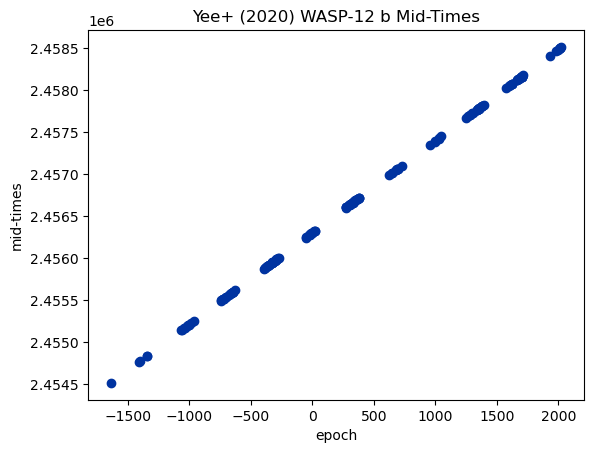

In [7]:
plt.scatter(epochs, mid_times, color="#0033A0")
plt.xlabel("epoch")
plt.ylabel("mid-times")
plt.title("Yee+ (2020) WASP-12 b Mid-Times")
plt.show()

-1.025496917951813e-09 [1.09142012e+00 2.45630546e+06]


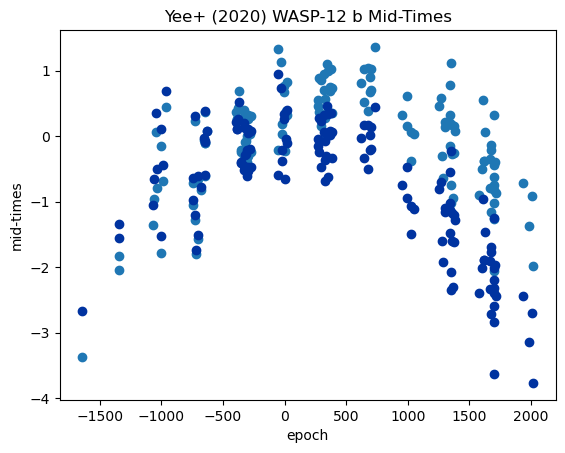

In [44]:
ind = tra_or_occs == 'tra'
popt = np.polyfit(epochs[ind], mid_times[ind], 2, w=1./mid_time_errs[ind])
print(2.*popt[0], popt[1:])

# plt.scatter(epochs[ind], (mid_times[ind] - np.polyval(popt[1:], epochs[ind]))*24.*60., color="#0033A0")
plt.scatter(epochs[ind], (mid_times[ind] - np.polyval([Yee_linear_period, Yee_linear_T0], epochs[ind]))*24.*60.)
plt.scatter(epochs[ind], (mid_times[ind] - np.polyval(popt[1:], epochs[ind]))*24.*60., color="#0033A0")
plt.xlabel("epoch")
plt.ylabel("mid-times")
plt.title("Yee+ (2020) WASP-12 b Mid-Times")
plt.show()

In [42]:
ind = tra_or_occs == 'tra'
popt, pcov = curve_fit(quad_fit, epochs[ind], mid_times[ind], sigma=mid_time_errs[ind])
print(2.*popt[0], popt[1:])

# # plt.scatter(epochs[ind], (mid_times[ind] - np.polyval(popt[1:], epochs[ind]))*24.*60., color="#0033A0")
# plt.scatter(epochs[ind], (mid_times[ind] - np.polyval([Yee_linear_period, Yee_linear_T0], epochs[ind]))*24.*60.)
# plt.scatter(epochs[ind], (mid_times[ind] - np.polyval(popt[1:], epochs[ind]))*24.*60., color="#0033A0")
# plt.xlabel("epoch")
# plt.ylabel("mid-times")
# plt.title("Yee+ (2020) WASP-12 b Mid-Times")
# plt.show()

-7.066168851776028e-09 [1.09142303e+00 2.45630546e+06]
